# Multi-ítem con restricción de espacio

## Introducción:
Se tienen 'm' ítems con restricción de volumen total 'S'. Es decir, los ítems compiten por ocupar un espacio finito.
El modelo que respresenta esta situación es el siguiente:

$ min_{q_i} \quad Z = CTE(q_1, q_2, ..., q_m)$

$ s.t.$

$ \quad q_1s_1 + q_2s_2 + ... + q_ms_m \leq S $

Se decide aplicar el método de relajación de Lagrange para resolver múltiples problemas más simples, y encontrar el óptimo entre todos ellos. Cada problema estará afectado por un multiplicador de Lagrange $\lambda$.

Siendo:

$f = CTE(q_1, q_2, ..., q_m)$

$g = (q_1s_1 + q_2s_2 + ... + q_ms_m - S)$

El modelo relajado será el siguiente:

$ L(\lambda) = min_{q_i} \quad Z_{relax} = f + \lambda g $

Como decíamos antes, existe un lambda para cada problema relajado. No todos los $\lambda$ arrojan resultados válidos, ya que este multiplicador penaliza la violación de la restricción que ahora forma parte de la función objetivo. La idea es encontrar el $\lambda$ que optimice la función primal cumpliendo con la región factible.

El problema original es cuadrático, pero es fácilmente demostrable que es convexo y por lo tanto cuenta con un óptimo global.

Se busca un $\lambda$ que maximice el $L$, teniendo en cuenta que debe minimizarse respecto a la cantidad, es decir, buscar la cantidad óptima.

Por lo tanto: 

$max_{\lambda} \ L(\lambda)$

$L(\lambda) = min_{q_i} \ Z_{relax}$

$Z_{relax} = f + \lambda g $

El modelo anterior, expresado en una línea sería: $max_{\lambda} min_{q_i} f + \lambda g $

## Aplicación en Python:
Inicializamos la librerías necesarias y cargamos las funciones asociadas a las expresiones introducidas en el apartado anterior.

En el caso de $g$ elegimos hacer producto matricial con el operador '@' que es el dot product. En python estas operaciones son mucho mas rápidas que el clásico for loop.

Para el $f$, a modo didáctico, explicamos cómo vectorizar una función. Obviamente, tanto $g$ como $f$ podrían hacerse con for loop y, a pesar de la pérdida de rendimiento, en estos ejemplos introductorios no se podría percibir la diferencia. Se hace de esta forma para poder mostrar una manera diferente y práctica de encarar soluciones con python.

In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Cantidad óptima:
def calcular_qopt(K, D, T, c1, s_i, lmbd):
    return math.sqrt((2 * K * D) / (T * c1 + 2 * lmbd *s_i))

# Restricción:
def calcular_g(vect_s, vect_q, S):
    return vect_s @ vect_q - S

def calcular_f_i(b_i, d_i, q_i, c1_i, t, k_i):
    return b_i * d_i + 0.5 * q_i * c1_i * t + k_i * (d_i / q_i)

# Objetivo primal:
def calcular_f(vect_b, vect_d, vect_q, vect_c1, t, vect_k):
    # Vectorizar la funcion:
    calcular_f_i_vectorizada =  np.vectorize(calcular_f_i)
    
    # Calcularmos f_i con la función vectorizada, mismos inputs que calcular_f_i pero 
    # en vectores con todos los valores.
    vector_f_i = calcular_f_i_vectorizada(vect_b, vect_d, vect_q, vect_c1, t, vect_k)
    
    # Nos devuelve un vector con cada f_i que tenemos que sumar y retornar:
    return np.sum(vector_f_i)

# Lagrangiano:
def calcular_L(f_q, g_q, lmbd):
    return f_q + lmbd * g_q

## Ejemplo
El siguiente ejemplo considera dos productos simples. Puede fácilmente extenderse a $n$ productos sin hacer mayores cambios.

In [87]:
# Ejemplo:
S = 150

diasmes = 30
t = 1 # período de análisis
interes = 0.1 # anual

# Datos producto 1:
b_1 = 30 #costo por producto
alquiler_1 = 30 # diario
compra_1 = 100 # unidad 
calidadrecepcion_1 = 200 # pedido
demanda_1 = 3000 # por año
k_1 = calidadrecepcion_1 + compra_1 # costo de orden
d_1 = demanda_1 # demanda
c1_1 = b_1 * interes + (alquiler_1 * diasmes * 12) # costo unitario
s_1 = 10

# Datos producto 2:
b_2 = 40 #costo por producto
alquiler_2 = 40 # diario
compra_2 = 150 # unidad 
calidadrecepcion_2 = 250 # pedido
demanda_2 = 4300 # por año
k_2 = calidadrecepcion_2 + compra_2 # costo de orden
d_2 = demanda_2 # demanda
c1_2 = b_2 * interes + (alquiler_2 * diasmes * 12) # costo unitario
s_2 = 15

# Construcción de vectores de datos:
vect_s = np.array([s_1, s_2])
vect_b = np.array([b_1, b_2])
vect_d = np.array([d_1, d_2])
vect_c1 = np.array([c1_1, c1_2])
vect_k = np.array([k_1, k_2])

### Resolución para un conjunto de lambdas a fuerza bruta
Creamos un array de lambdas equidistantes, vamos a resolver múltiples $L(\lambda)$ para cada \lambda. De todos ellos vamos a seleccionar el mayor, que refiere al mínimo del modelo primal para el lambda que hace cumplir la restricción.

En un for loop, iteramos en cada \lambda y resolvemos: cantidad óptima y $L(\lambda)$.

In [88]:
lmbds = np.array(range(0, 6000, 10))
L = np.zeros(lmbds.shape)

for i, lmbd_i in enumerate(lmbds):
    # Cálculo de cada cantidad óptima:
    q1_opt = calcular_qopt(k_1, d_1, t, c1_1, s_1, lmbd_i)
    q2_opt = calcular_qopt(k_2, d_2, t, c1_2, s_2, lmbd_i)

    # Construcción de arrays de q:
    vect_q_opt = np.array([q1_opt, q2_opt])

    # Cálculo de g y f:
    g = calcular_g(vect_q_opt, vect_s, S)
    f = calcular_f(vect_b, vect_d, vect_q_opt, vect_c1, t, vect_k)

    # Cálculo del lagrangiano:
    L[i] = calcular_L(f, g, lmbd_i)
    
# Máximo:
max_index = np.argmax(L)
L_max = L[max_index]
lmbd_max = lmbds[max_index]

# Resultados:
print('RESULTADOS:')
print(f'El lambda óptimo es: {lmbd_max:.2f}')

q1_opt = calcular_qopt(k_1, d_1, t, c1_1, s_1, lmbd_max)
q2_opt = calcular_qopt(k_2, d_2, t, c1_2, s_2, lmbd_max)
vect_q_opt = np.array([q1_opt, q2_opt])
print(f'Las cantidades óptimas son: {q1_opt:.2f}, {q2_opt:.2f}')

f = calcular_f(vect_b, vect_d, vect_q_opt, vect_c1, t, vect_k)
print(f'El CTE óptimo es: {f:.2f}')

RESULTADOS:
El lambda óptimo es: 2400.00
Las cantidades óptimas son: 5.53, 6.31
El CTE óptimo es: 772591.03


Se procede a plotear los resultados en una curva que muestra $L$ en función de $\lambda$. Marcamos el punto de cantidad óptima.

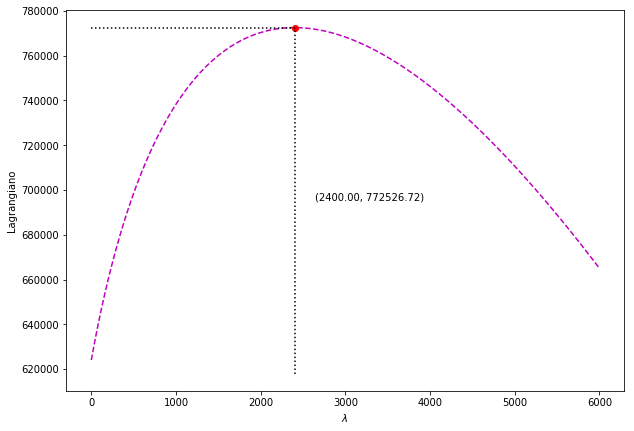

In [89]:
# Subplots:

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(lmbds, L, 'm--', label='Lagrangiano respecto de cada $\lambda$')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('Lagrangiano')

ax.plot(lmbd_max, L_max, 'r', marker='o') # punto óptimo
ax.plot([0, lmbd_max], [L_max, L_max], 'k:')
ax.plot([lmbd_max, lmbd_max], [L_max*(1-0.2), L_max], 'k:')
ax.annotate(f'({lmbd_max:.2f}, {L_max:.2f})', (lmbd_max*(1+0.1), L_max*(1-0.1)))

plt.show()

### Método del gradiente para buscar $\lambda$

Se evita buscar el multiplicador de manera forzosa. Para lograr este objetivo, elegimos aplicar el método del gradiente en su forma más simple, es decir, teniendo en cuenta muchas suposiciones y un paso de búsqueda constante.

Sabemos que el problema tiene un sólo óptimo global en un espacio de búsqueda convexo. A partir de un punto inicial de búsqueda, vamos a dirigirnos en la dirección del gradiente respecto de \lambda del Lagrangiano $L(\lambda)$ para actualizar sucesivos valores de \lambda. Una vez que dos valores de $\lambda$ consecutivos no muestren cambios, el procedimiento finaliza.

El algoritmo sería el siguiente:

- Inicializar $\lambda$. Dado que habíamos encontrado un valor parcial de lambda anteriormente, usamos uno cercano para iniciar la búsqueda. Esto igualmente, no es obligatorio.
- Calcular el valor del Lagrangiano dado el $\lambda$ actual.
- Calcular el gradiente del Lagrangiano $ \nabla{L(\lambda)}$. Resulta ser el mismo valor que $g$
- Actualizar el valor de $\lambda$ para la próxima iteración: $\lambda_{i+1} = \lambda_i + step * \nabla{L(\lambda)}$
- Calculamos la diferencia entre lambdas sucesivos: $\Delta \lambda = | \lambda_{i+1} - \lambda_{i} |$
- Si la diferencia es menor que una tolerancia dada, cortamos el algoritmo.

En este caso la función de búsqueda es diferenciable, por lo tanto podríamos omitir la tolerancia e ir a buscar una diferencia de \lambda sucesivos igual a cero. Sin embargo, es preferible tener controlado el corte y no depender de una convergencia que puede resultar muy larga.

*Nota: En caso de no ser diferenciable la función, el método puede aplicarse igual, pero en este caso se calcula el Subgradiente. Es el mismo procedimiento pero el gradiente es válido en cada trozo de la función. No pueden encontrarse diferencias de \lambda iguales a cero y debe controlarse una tolerancia.*

In [90]:
def gradiente_L(vect_s, vect_q, S):
    return vect_s @ vect_q - S

lmbd_0 = 0
step = 10 # paso fijo, sólo funciona en estos casos simples. Referirse a "métodos de paso adaptativo"
tol = 10e-3
i = 0
lmbd_i = lmbd_0
lmbd_array = []
L = []
diff = np.inf

while diff > tol:
    # Cálculo de cada cantidad óptima:
    q1_opt = calcular_qopt(k_1, d_1, t, c1_1, s_1, lmbd_i)
    q2_opt = calcular_qopt(k_2, d_2, t, c1_2, s_2, lmbd_i)

    # Construcción de arrays de q:
    vect_q_opt = np.array([q1_opt, q2_opt])

    # Cálculo de g y f:
    g = calcular_g(vect_q_opt, vect_s, S)
    f = calcular_f(vect_b, vect_d, vect_q_opt, vect_c1, t, vect_k)

    # Cálculo del lagrangiano:
    L.append(calcular_L(f, g, lmbd_i))
    
    # Nuevo lambda:
    lmbd_old = lmbd_i
    lmbd_array.append(lmbd_old)
    lmbd_i = max(lmbd_i + step * gradiente_L(vect_q_opt, vect_s, S), 0) # lambda positivo
    
    # Chequeo de convergencia:
    diff = abs(lmbd_i - lmbd_old)
    
    i+=1
    
# Resultados:
print('RESULTADOS:')
print(f'El lambda óptimo es: {lmbd_i:.2f}')
print(f'Las cantidades óptimas son: {q1_opt:.2f}, {q2_opt:.2f}')
print(f'El CTE óptimo es: {f:.2f}')


RESULTADOS:
El lambda óptimo es: 2398.94
Las cantidades óptimas son: 5.53, 6.31
El CTE óptimo es: 772524.68


Ploteamos los sucesivos $\lambda$ respecto del número de iteraciones.

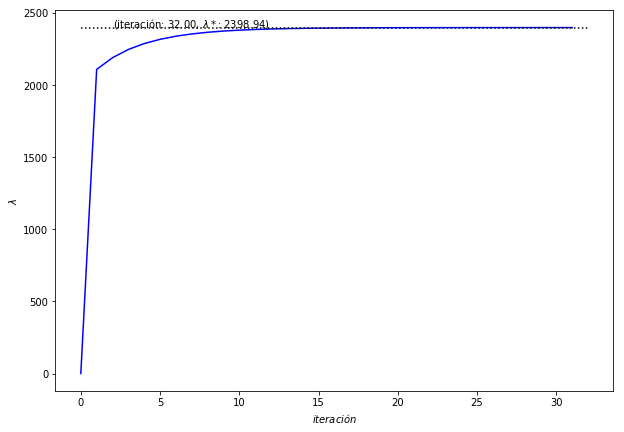

In [91]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(range(0, i), lmbd_array, 'b', label='Lagrangiano respecto de cada $\lambda$')

ax.set_xlabel('$iteración$')
ax.set_ylabel('$\lambda$')
ax.plot([0, i], [lmbd_i, lmbd_i], 'k:')
ax.annotate(f'(iteración: {i:.2f}, $\lambda *$: {lmbd_i:.2f})', (i-30, lmbd_i+1))

plt.show()